In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords

In [127]:
if not os.path.exists('images'):
    os.mkdir('images')

In [72]:
posts=pd.read_csv('data/posts.csv')

In [78]:
# Splitting the data set into Onion and News for word count analysis
onion = posts.loc[posts['is_onion'] == 1]

news = posts.loc[posts['is_onion'] == 0]

In [80]:
X_onion=onion['title']
X_news=news['title']

In [183]:
# Creating a customized stop word list

sw_nltk = stopwords.words('english')
sw = sw_nltk + ['thread', 'worldnews', 'live', 'onion']

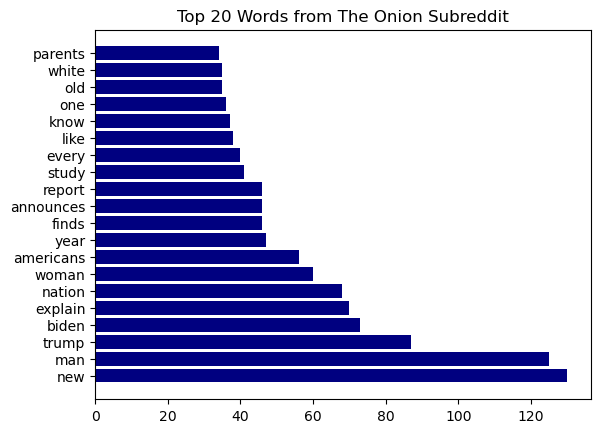

In [189]:
# Determining the top 20 words in The Onion posts
cvec_onion = CountVectorizer(stop_words=sw)
X_onion_cv = cvec_onion.fit_transform(X_onion)
onion_df = pd.DataFrame(X_onion_cv.toarray(), columns = cvec_onion.get_feature_names_out())

onion_top20 = onion_df.sum().sort_values(ascending=False).head(20)

plt.barh(onion_top10.index, onion_top10, color='navy')
plt.title('Top 20 Words from The Onion Subreddit');
plt.savefig('images/onion_top20.png', dpi=192)

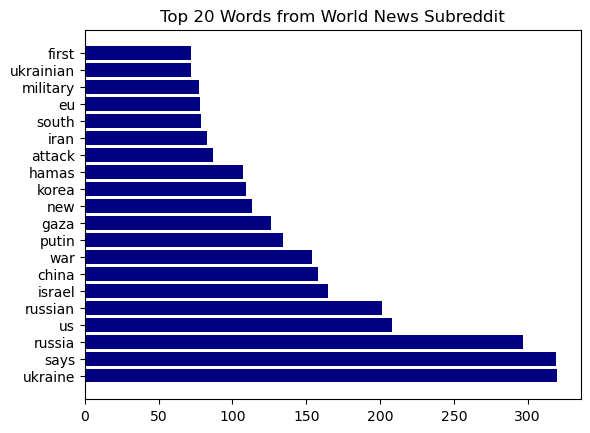

In [175]:
# Determining the top 20 words in The Onion posts
cvec_news = CountVectorizer(stop_words=sw)
X_news_cv = cvec_news.fit_transform(X_news)
news_df = pd.DataFrame(X_news_cv.toarray(), columns = cvec_news.get_feature_names_out())
news_top20 = news_df.sum().sort_values(ascending=False).head(20)

plt.barh(news_top20.index, news_top20, color='navy')
plt.title('Top 20 Words from World News Subreddit');
plt.savefig('images/news_top20.png', dpi=192)